# Introduction to scikit-learn and classical machine learning for image segmentation and classification

In this notebook we are going to perform image segmentation using scikit-learn machine learning models.   
We will be covering:
1. Image Loading and normalization
2. Unsupervised machine learning segmentation using k-means clustering
3. Segmentation quality by measuring Intersection over Union (IoU)
4. Creating extra features (data points) from pixel values
5. Supervised machine learning with random forest classifier

## 1. Let's start by installing all required libraries

In [1]:
!pip install numpy scikit_image scikit_learn matplotlib pandas -q

## 2. Image Loading
---
Let's start by loading the image we want to segment using the [imread](https://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imread) function of scikit-image, found in the io module.

```python
from skimage.io import imread
image = imread("path/to/image")
```

---

start by using the image found in `../data/images/wt_dna.tif`

and then let's display it using [matplotlib imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) function

```python
from matplotlib import pyplot as plt
plt.imshow(image, cmap="gray")
```

---
  
Note: when in doubt about a specific function you can always use the help function to get the documentation (`help(function_name)`) or, put the cursor inside the function you need help for and press `Shift+Tab` (_Note:_ only works in the browser) to get more information

don't forget, you need to import it first

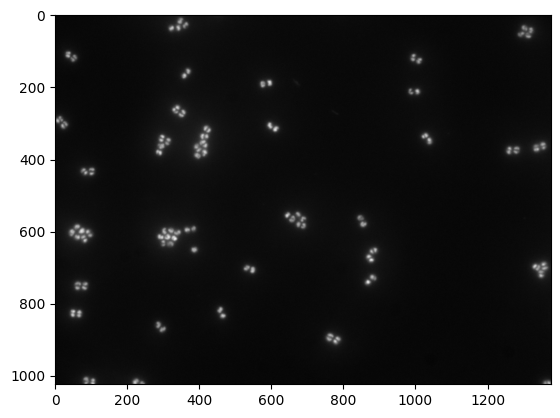

In [ ]:
# your code here
from skimage.io import imread
image = imread("../data/images/wt_dna.tif")

from matplotlib import pyplot as plt
plt.imshow(image, cmap="gray")

## 3. Normalize the intensity values of the image to range 0 to 1
When dealing with machine learning approaches, images should be normalized for machine learning. This ensures that pixel values are scaled to a consistent range, typically between 0 and 1, which helps improve model convergence, reduces numerical instability, and ensures that features are treated uniformly during training.
There are many ways to normalize images, for these exercises we will use [min-max Normalization](https://en.wikipedia.org/wiki/Normalization_(image_processing)).

min-max Normalization is: 

$ I_{norm} = (I - I_{min})\frac{newMax - newMin}{I_{max} - I_{min}} - newMin $

Let's create our own normalization fuction using numpy array [min](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.min.html) and [max](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html) methods to find the min and max values of the image and perform the calculation.
We are also going to convert it's values to float precision by using the [astype](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) method and numpy's float32 datatype.
```python
array.astype(np.float32)
```

---

Use the following skeleton for the function:

_Hint_: newMax and newMin can be ommited since we want to normalize between 0 and 1

Example code:
```python
def custom_function(input):
    # your code here
    return output
```

Note: don't forget to import packages as needed


In [3]:
# your code here
import numpy as np
def normalize_intensities(input_image):
    "Function to normalize the intensities of a given image to range [0, 1]"
    image = input_image.astype(np.float32)
    min_val = image.min()
    max_val = image.max()
    output = (image - min_val) / (max_val - min_val)
    return output


Let's:
1. apply that function to the loaded image
2. store the output in a new variable called "normalized_image"
3. display the normalized image

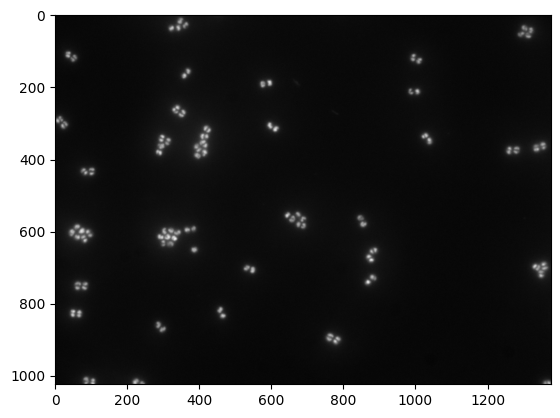

In [4]:
# your code here
normalized_image = normalize_intensities(image)
plt.imshow(normalized_image, cmap="gray")

Let's check whether the normalization worked by printing the minimum and maximum values of both images

In [5]:
# your code here
print(image.min(), image.max())
print(normalized_image.min(), normalized_image.max())

600 3443
0.0 1.0


## 4. Using unsupervised machine learning for segmentation

One of the great things about scikit-learn is that most machine learning models follow the same structure for their API:
1. They are typically writen as Python classes that need to be initialized
2. have a `.fit(data)` method to train
3. a `.predict(data)` method to make predictions


Example code:

```python
from sklearn.model_module import Model
model = Model()
model.fit(data2train) # typically expects an array with shape (n_samples, n_features)
output = model.predict(data2predict) # same shape as data2train
# then we need to reshape the output to the desired shape
```

---

We will start by trying to use the [K-Means clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) algorithm.
For it's class initialization, we need to define the number of clusters we want to use. For binary segmentation, we will use 2 clusters.

In [6]:
# your code here
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=100)

Then let's reshape the data to the expected shape for the KMeans algorithm (n_samples, n_features).
For this we will be using the [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) method of numpy:
```python
reshaped_array = array.reshape((-1, 1))
```

In this case we can consider the `n_samples` equal to `n_pixels` and `n_features` equal to it's value.  
So it's final shape should correspond to `(n_pixels, 1)`

In [7]:
# your code here
reshaped_image = normalized_image.reshape((-1, 1))
print(reshaped_image.shape)

(1409024, 1)


Exercise:
1. train the model using the reshaped image
2. predict using the same reshaped image (_Note_: we would typically want to test the quality of the segmentation on data not used for training)
3. reshape the predicted output to the original image shape
4. display it

In [8]:
# your code here
kmeans.fit(reshaped_image)
segmented_image = kmeans.predict(reshaped_image)
segmented_image = segmented_image.reshape(image.shape)

## 5. Let's display the segmented image together with the original image and ground truth mask

The ground truth mask can be found on the same path as the original image with name "`wt_mask.tif`".  
Use `imread` again to load it.  
  
We can use matplotlib subplots to display multiple images at once:
```python
plt.subplot(n_rows, n_cols, image_index)
plt.title("Image Title")
plt.imshow(image, cmap='gray')
plt.axis('off') # just to make it look better to remove unnecessery axis which occupy space in the image frame
```

Step-by-step:
1. read the ground truth image
2. display original image
3. display ground truth image
4. display the segmentation result

(-0.5, 1375.5, 1023.5, -0.5)

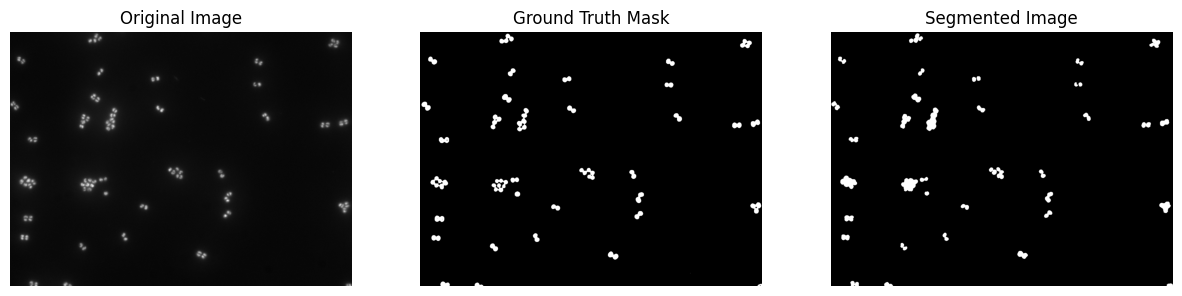

In [9]:
# your code here
gt_mask = imread("../data/images/wt_mask.tif")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Ground Truth Mask")
plt.imshow(gt_mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Segmented Image')
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

Eye test tells us that the segmentation result is not so bad, but we shouldn't relly on our eyes for it.
How can we properly evaluate the quality of segmentation?

## 6. Metrics for image segmentation quality
There are several metrics to evaluate the quality of segmentation. In this example, we will use the Intersection over Union (IoU) metric:  
  
<img src="https://viso.ai/wp-content/uploads/2024/01/IoU-Formula.jpg" width=600>

This metric will output a score ranging from 0 (bad) to 1 (good).

---

### Implement your own IoU function

1. First we need to make sure that both ground truth image and the segmentation have the desired data type when playing with masks (booleans: True/False).  
    - We can do this by using the [astype](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) method and Python's bool datatype.  

2. Then we need to calculate the intersection between the masks. With booleans, this can be achieved by doing a logical `and` operation to check which elements are in both masks:
    - using numpy's [logical_and](https://numpy.org/doc/2.0/reference/generated/numpy.logical_and.html) method

3. Followed by the union, which can be achieved with a logical `or` operation, checking which pixels are in union of both masks:
    - using [logical_or](https://numpy.org/doc/2.0/reference/generated/numpy.logical_or.html) method

And finally we can calculate IoU as:
```python
iou_score = float(np.sum(intersection) / np.sum(union))
# np.sum will count the number of pixels in the intersection and union that have a value of True (== 1)
```

---

Use the following skeleton to define the iou function:
```python
def iou(image1, image2):
    # mask_1 data type as bool
    # mask_2 data type as bool 
    
    # calculate the intersection
    # calculate the union

    # return the iou score
    return iou_score
```


In [10]:
# your code here
def iou(prediction, gt):
    prediction = prediction.astype(bool)
    gt = gt.astype(bool)
    intersection = np.logical_and(prediction, gt)
    union = np.logical_or(prediction, gt)
    iou_score = intersection.sum() / union.sum()
    return iou_score

Use your newly created function to calculate the IoU score for the segmentation result:

In [11]:
# your code here
iou_kmeans = iou(segmented_image, gt_mask)
print(f'The IoU score for kernel k=2 is {iou_kmeans}')

The IoU score for kernel k=2 is 0.5134216418917096


## 6.2 Repeat the same task by yourself using a different image (`wt_membrane.tif` or `wt_phase_contrast.tif`)

- Load the image
- Normalize the intensities
- Train a KMeans model with your new image
- Predict the segmentation with your new image
- Display the result and evaluate the quality of segmentation using the IoU function

Always feel free to ask for help :)

In [12]:
# your code here

## 7. Using Supervised Machine Learning for segmentation

Supervised machine learning require pairs of inputs and labels.
For this exercise we will use the [Random Forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).


Let's start by loading the images we want to segment using the [imread](https://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imread) function of scikit-image, found in the io module.  
  
  
Start by using the image found in `../data/images/wt_dna.tif` and don't forget to normalize the intensities.

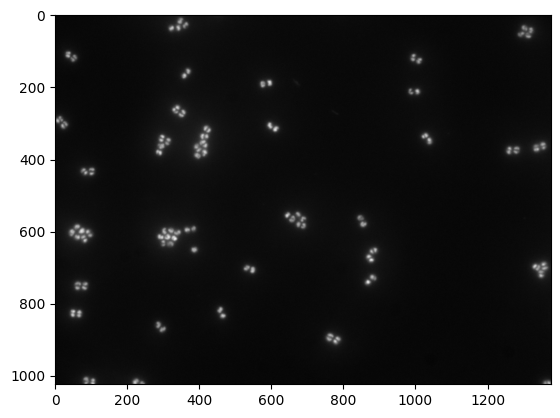

In [10]:
# your code here
image = imread("../data/images/wt_dna.tif")
normalized_image = normalize_intensities(image)
plt.imshow(image, cmap="gray")

## 8. Manually creating labels to train our classifier

We can create an annotation image by using the [zeros_like](https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html) function and then manually assigning the labels in the new array.  
   
  
  
Let's use label `1` for background and `2` for cells.
   
```python
labels = np.zeros_like(image)
labels[row_start:row_end, col_start:col_end] = 1 # background
labels[row_start:row_end, col_start:col_end] = 2 # cell
```

Use the following indexes for background:
- [200:220, 730:750]  
  
And for cells:
- [260:270, 335:345]
- [305:315, 595:605]

This process of training on only partially labelled data is often refered to as shallow learning.

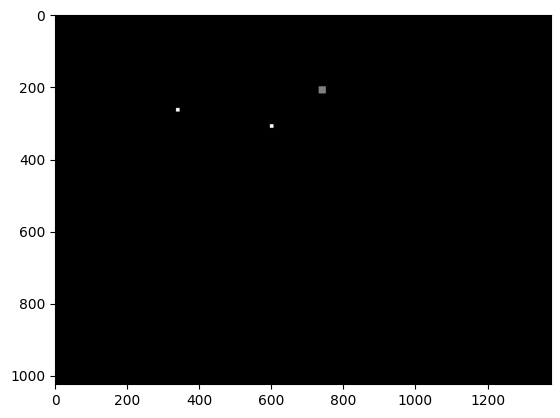

In [11]:
# your code here

labels = np.zeros_like(normalized_image)
labels[200:220, 730:750] = 1
labels[260:270, 335:345] = 2
labels[305:315, 595:605] = 2

plt.imshow(labels, cmap="gray")

## 9. Adding extra features to the training data
Although we could actually train with just the pixel values, they may not contain enough information to do a good job. It would be a more expensive way of doing a simple intensity threshold wihtout improving on it. 

So, we can add more features to the training data to increase the classifier power. 
This is especially important when we are performing shallow learning as, otherwise, the classifier wouldn't have enought data to actually learn meaningful differences.
  

For this we are going to create a custom function to generate features from the image.
These features can be many things, but often a good starting point is to apply several filters to the image and use the output as features.
We will be using [scikit-image filters](https://scikit-image.org/docs/dev/api/skimage.filters.html) module for this.
Let's try to use:
- [gaussian](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian)
- [sobel](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel) (edge detection)
- [median](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median)

_Note_: Don't forget that, as before, we need our data to be in shape `(n_samples, n_features)`.

Use the following skeleton for the new custom function:

```python
def generate_feature_stack(image):
    # determine features
    features_1 = filters.filter_1(image) # don't forget to add the filter parameters if needed
    features_2 = filters.filter_2(image)
    features_3 = filters.filter_3(image)

    feature_stack = [
        image.ravel(), # .ravel() reshapes a n-dimensional array into a 1-D image.
        features_1.ravel(),
        ...
    ]

    return np.asarray(features_stack) # convert the feature stack into a numpy array
```

In [12]:
# your code here
from skimage import filters

def generate_feature_stack(image):
    blurred = filters.gaussian(image, sigma=2)
    edges = filters.sobel(blurred)
    median = filters.median(image)

    feature_stack = [
        image.ravel(),
        blurred.ravel(),
        edges.ravel(),
        median.ravel()
    ]

    return np.asarray(feature_stack)

Next:
1. use the newly defined function to create the feature stack for our normalized image
2. display the features usign the matplotlib `imshow` function. __Note__: We need to reshape the features in order to display them as 2D images.

(-0.5, 1375.5, 1023.5, -0.5)

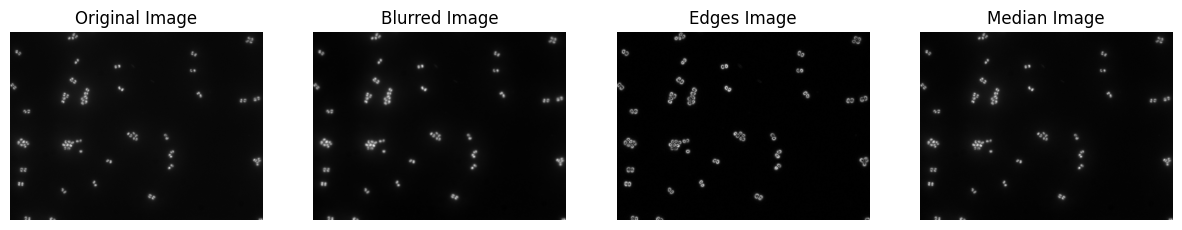

In [16]:
# your code here
feature_stack = generate_feature_stack(normalized_image)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Blurred Image")
plt.imshow(feature_stack[1].reshape(image.shape), cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Edges Image")
plt.imshow(feature_stack[2].reshape(image.shape), cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Median Image")
plt.imshow(feature_stack[3].reshape(image.shape), cmap='gray')
plt.axis('off')

__Bonus__:
These images are too small to see the effect of our filters.
Let's crop the image, as we did yesterday, and display a smaller region of interest.

_Hint_: use start and stop indexes for `x` and `y` coordinates and slicing

(-0.5, 299.5, 299.5, -0.5)

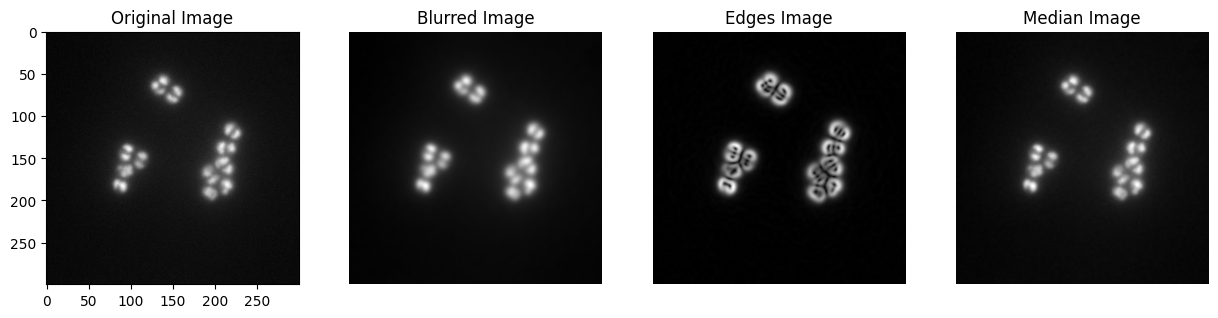

In [18]:
# your code here
x_start, x_end = 200, 500
y_start, y_end = 200, 500

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(image[y_start:y_end, x_start:x_end], cmap='gray')
# plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Blurred Image")
plt.imshow(feature_stack[1].reshape(image.shape)[y_start:y_end, x_start:x_end], cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Edges Image")
plt.imshow(feature_stack[2].reshape(image.shape)[y_start:y_end, x_start:x_end], cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Median Image")
plt.imshow(feature_stack[3].reshape(image.shape)[y_start:y_end, x_start:x_end], cmap='gray')
plt.axis('off')

## 10. Format the data according to scikit-learn requirements.
Since we have only partially labelled images, we need to create the training arrays with just the pixels that have been annotated.

We can use numpy index filtering to remove all pixels from the `feature` and `labels` arrays which have not been annotated.

Let's create our own custom function that performs this for both the `feature` stack and `labels`.
```python
def format_data(feature_stack, annotation):
    # start let's use ravel to make annotations a 1D array
    y = annotation.ravel()
    # then transpose the feature stack so that each feature will have the same indexes as the annotations
    X = feature_stack.T

    # start by creating a binary mask on labelled pixels
    mask = y > 0 # creates a mask of True and False

    # then we removel all pixels from the feature and annotations which have not been annotated
    # apply the mask
    X = X[mask] # with numpy arrays this allows us to select only the pixels that are True in the mask array
    y = y[mask]

    return X, y
```

In [17]:
# your code here
def format_data(feature_stack, annotations):
    X = feature_stack.T
    y = annotations.ravel()
    
    mask = y > 0
    X = X[mask]
    y = y[mask]
    
    return X, y

apply this function to the feature stack and the annotations to generate the formated data and store them in variables called `X_train` and `y_train`. 

In machine learning contexts, it is common to use "X" and "Y" variables for data and labels, respectively, which are not to be confused with the dimensions of image data.

In [18]:
# your code here
X_train, y_train = format_data(feature_stack, labels)
print(X_train.shape, y_train.shape)

(600, 4) (600,)


## 11. Let's train the random forest classifier
Now we use the training data we just prepared to train a new random forest model.

Remember that all scikit-learn models have roughly the same API so we do the following:   

```python
from sklearn.model_module import Model
model = Model()
model.fit(X_data2train, y_data2train) # now we need to pass both data (X) and labels (y)
output = model.predict(data2predict) # same shape as data2train
# then we need to reshape the output to the desired shape
```

The Random Forest classifier is part of the ensemble module of scikit-learn.

In [19]:
# your code here
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=100)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

## 12. Segment the whole image using the trained classifier.

Let's:
1. do the prediction using the generated_feature_stack (don't forget to transpose it)
2. visualize the original image, ground truth and prediction
3. measure the IoU score using the previously created function

---

IMPORTANT:
- we need to subtract one from the prediction before calling the iou function because the labels start at 1 and our ground truth starts at 0.
This can be achieved by:
```python
prediction = classifier.predict(feature_stack.T) - 1
```
- we also need to reshape the prediction back to the original image shape

IoU score:0.5055328481706709


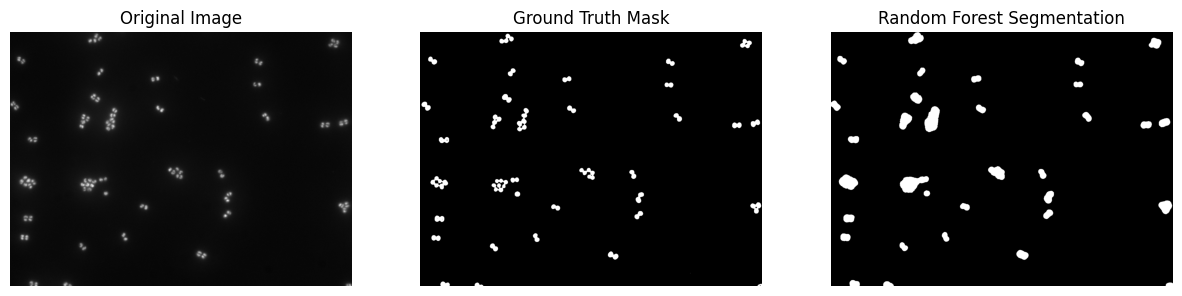

In [20]:
# your code here
prediction = classifier.predict(feature_stack.T) - 1 # we subtract 1 to make background = 0

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Ground Truth Mask")
plt.imshow(gt_mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Random Forest Segmentation")
plt.imshow(prediction.reshape(image.shape), cmap='gray')
plt.axis('off')

print("IoU score:" + str(iou(prediction.reshape(image.shape), gt_mask)))

## 13. Let's use napari to create a better annotation image
1. On BAND open napari and load the `wt_dna.tif` image there.
2. Create a new label image
3. Use the drawing tool to label background with 1 and cells with 2
4. Save the label layer as `wt_labels.tif`
5. load the annotations here and repeat the steps from above:
    - format data
    - train classifier
    - predict, visualize and measure

IoU score:0.5193526022615889


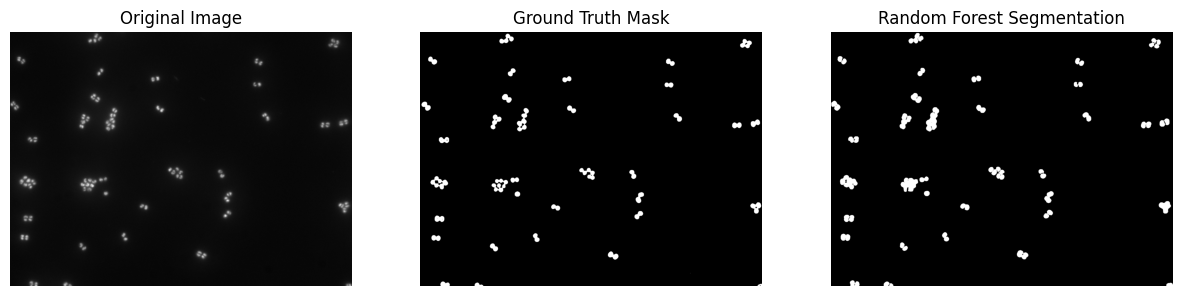

In [21]:
# your code here
napari_labels = imread("../data/images/wt_labels.tif")
X_train, y_train = format_data(feature_stack, napari_labels)
classifier = RandomForestClassifier(random_state=100)
classifier.fit(X_train, y_train)
prediction = classifier.predict(feature_stack.T) - 1 # we subtract 1 to make background = 0

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Ground Truth Mask")
plt.imshow(gt_mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Random Forest Segmentation")
plt.imshow(prediction.reshape(image.shape), cmap='gray')
plt.axis('off')

print("IoU score:" + str(iou(prediction.reshape(image.shape), gt_mask)))

# 14. Let's try another supervised algorithm: K-Nearest Neighbors
This classifiers uses a parameter `k`, which is the number of nearest neighbors. The default value is 5.
It is the supervised equivalent of the k-means clustering algorithm.

Remember that all scikit-learn models have roughly the same API so we do the following:
```python
from sklearn.model_module import Model
model = Model()
model.fit(X_data2train, y_data2train) # now we need to pass both data (X) and labels (y)
output = model.predict(data2predict) # same shape as data2train
# then we need to reshape the output to the desired shape
```

---

[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) is part of the neighbors module of scikit-learn.

Let's:
1. Use the previously defined X_train and y_train to train the new classifier
2. predict the segmentation using the transposed feature stack
3. visualize the original image, ground truth and prediction
4. measure the IoU score using the previously created function


IoU score:0.5187628367766098


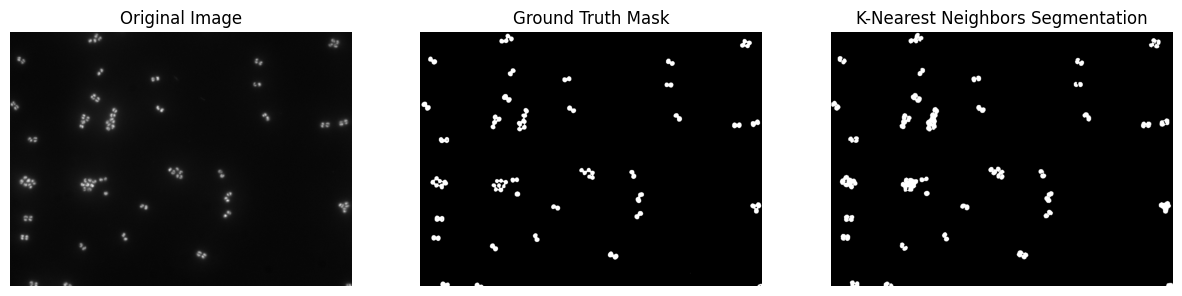

In [22]:
# your code here
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(2)
classifier.fit(X_train, y_train)
prediction = classifier.predict(feature_stack.T) - 1 # we subtract 1 to make background = 0

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Ground Truth Mask")
plt.imshow(gt_mask, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("K-Nearest Neighbors Segmentation")
plt.imshow(prediction.reshape(image.shape), cmap="gray")
plt.axis("off")

print("IoU score:" + str(iou(prediction.reshape(image.shape), gt_mask)))

## 15. Repeat the task now for the sle1 images, feel free to try either membrane, dna or phase_contrast

In [23]:
# your code here